<a href="https://colab.research.google.com/github/LS10432/PDDS-PYD-0825-06Oct2025B/blob/main/Project/A4/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# @title
import pandas as pd

# Define the local path and the URL for the covid dataset
local_path = '/content/owid-covid-data.csv'
covid_url = 'https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv'

try:
    # Try to read the Titanic dataset from the local path
    df = pd.read_csv(local_path)
    print(f"Successfully loaded data from {local_path}")
    print("\n")
except FileNotFoundError:
    # If the local file is not found, read the dataset from the URL
    df = pd.read_csv(covid_url)
    print(f"Local file not found. Loading data from {covid_url}")
    print("\n")

print(f"Total number of columns: {df.shape[1]}")
print(f"Total number of rows: {df.shape[0]}")

# Identify and count missing values in each column
print(df.isnull().sum())

# Display columns with missing values and count how many columns have no missing values
missing_cols = df.isnull().sum() != 0
print(f"Number of columns with no missing values: {len(missing_cols) - missing_cols.sum()}")
print(f"Number of columns with missing values: {missing_cols.sum()}")

missing_values_percentage = df.isnull().mean() * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(columns_to_drop)

# Print number of columns to be dropped
print(f"Number of columns to be dropped: {len(columns_to_drop)}")
print("Column Names to be dropped:")
print(columns_to_drop)

# Remove columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

# Print number of columns remaining
print("\n")
print(f"Number of columns after removal: {df.shape[1]}")

# Convert the 'date' column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# Print the number of missing values per column before imputation
print("Number of missing values per column before imputation:")
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print (f"Number of columns with numerical value :{len(numerical_cols)}")

# Impute missing values in numerical columns using the mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print (f"Number of columns with non-numerical value :{len(categorical_cols)}")

# Impute missing values in categorical columns using the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values, take the first
        df[col] = df[col].fillna(mode_val)

# Print the number of remaining missing values per column
print("\nNumber of remaining missing values per column after imputation:")
print(df.isnull().sum())

# Get the number of rows before removing duplicates
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Count the number of unique duplicate rows
unique_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Number of unique duplicate rows: {unique_duplicate_rows}")

# Remove duplicate rows
df = df.drop_duplicates()

# Get the number of rows after removing duplicates
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique countries from the 'location' column
unique_countries = df['location'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the total count of unique countries
print(f"Total number of unique countries: {num_unique_countries}")

# Display the list of unique countries
print("\nList of unique countries:")
print(unique_countries)

Local file not found. Loading data from https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv


Total number of columns: 67
Total number of rows: 358838
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
Number of columns with no missing values: 4
Number of columns with missing values: 63
Columns with more than 90% missing values:
['weekly_icu_admissions', 'weekly_

#Activity 4: Regional COVID-19 dynamics and patterns
Regional Analysis Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and fatality across time and continents.

## Visualize monthly new cases by continent
1. Create a grouped bar chart to visualize new cases by continent and month.

### Prepare data for monthly new cases by continent
Group the data by continent and month, summing the `new_cases` for each group.


**Reasoning**:
Group the DataFrame by continent and month and calculate the sum of new cases for each group.



In [20]:
df_monthly_new_cases_continent = df.groupby(['continent', 'month'])['new_cases'].sum().reset_index()

**Reasoning**:
Create a grouped bar chart to visualize the new cases by continent and month using seaborn.barplot, setting x to 'month', y to 'new_cases', and hue to 'continent'. Add a title and axis labels, then display the plot.



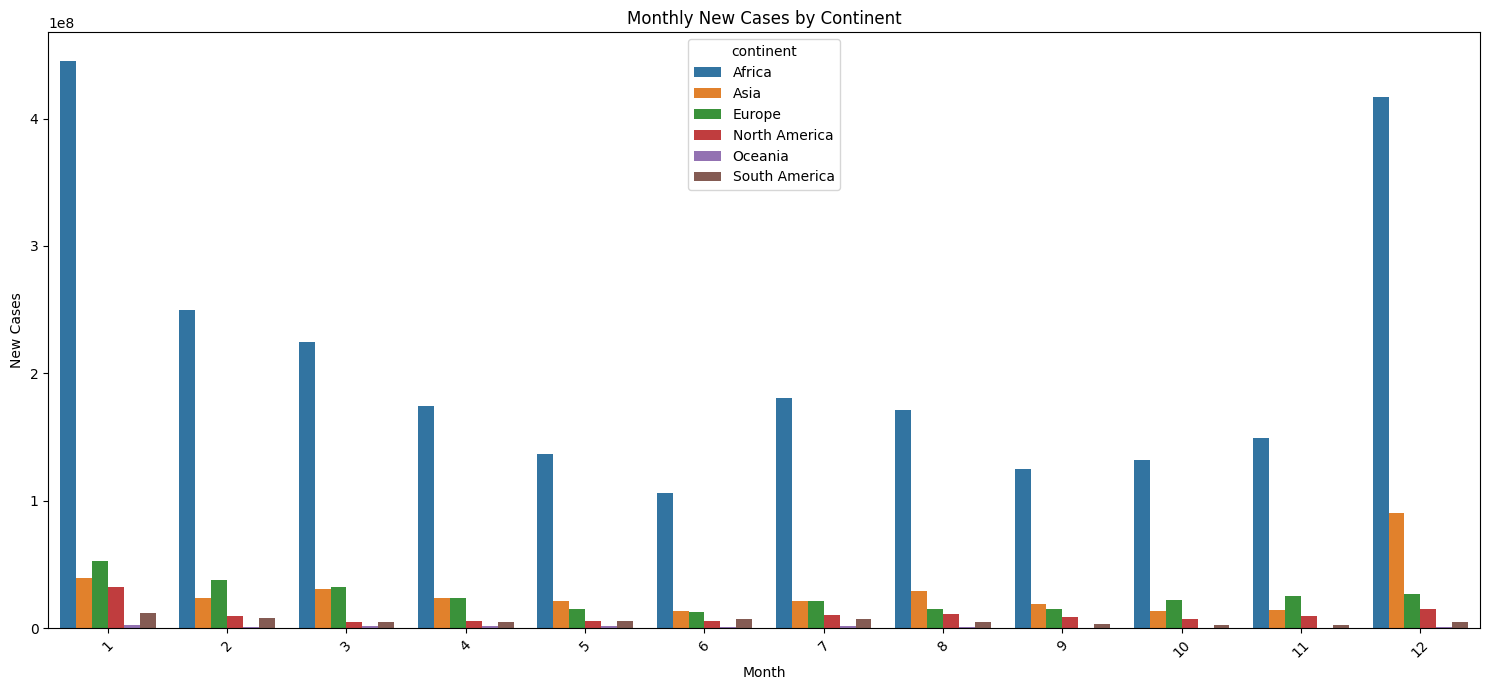

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.barplot(data=df_monthly_new_cases_continent, x='month', y='new_cases', hue='continent')
plt.title('Monthly New Cases by Continent')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize total cases distribution by year
2. Visualize the distribution of total COVID-19 cases by year using a box plot.


### Prepare data for total cases distribution by year
Ensure the 'date' column is in datetime format and extract the year.


**Reasoning**:
Create a box plot to visualize the distribution of total COVID-19 cases by year.



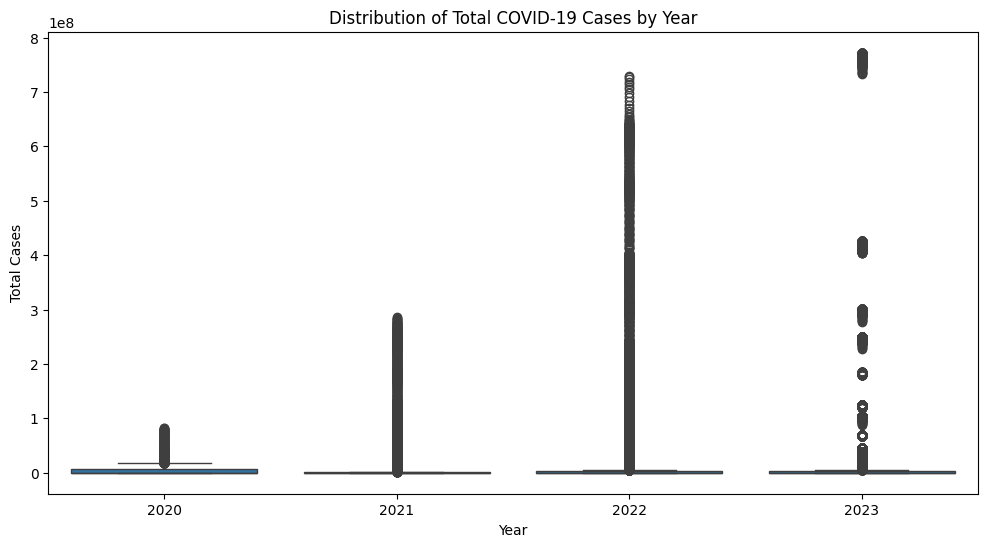

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='total_cases', data=df)
plt.title('Distribution of Total COVID-19 Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

## Visualize total deaths by continent
3. Compare total deaths across different continents using a bar plot.

### Prepare data for total deaths by continent
Group the data by continent, summing the `total_deaths` for each continent.


**Reasoning**:
Group the DataFrame by 'continent' and sum the 'total_deaths', then reset the index to create a new DataFrame.



In [23]:
df_continent_deaths = df.groupby('continent')['total_deaths'].sum().reset_index()
display(df_continent_deaths)

,continent,total_deaths
0,Africa,2.077518e+10
1,Asia,2.525415e+09
2,Europe,2.778771e+09
3,North America,2.125727e+09
4,Oceania,1.477310e+09
5,South America,1.520126e+09


**Reasoning**:
Generate a bar plot to visualize the total deaths per continent.



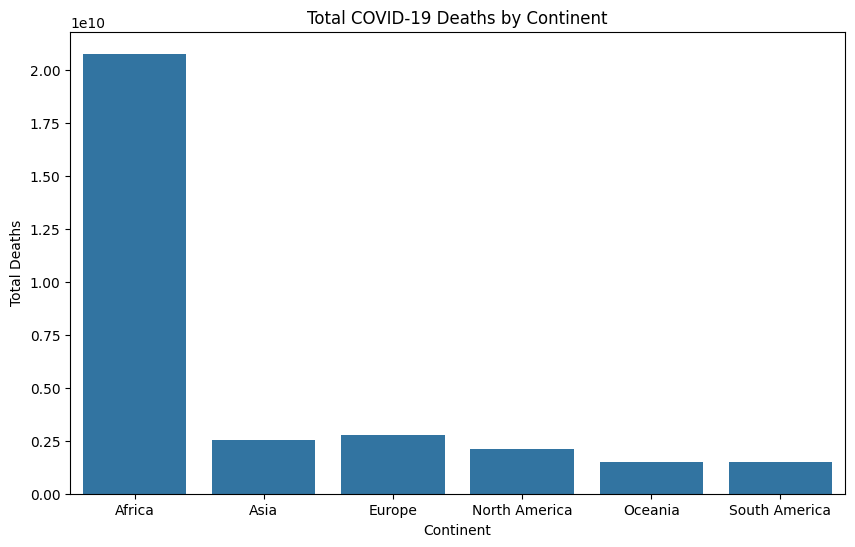

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='total_deaths', data=df_continent_deaths)
plt.title('Total COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.show()

## Visualize total cases by month
4. Analyze the total cases on a month-by-month basis using a bar plot.

### Prepare data for total cases by month
Group the data by month, summing the `total_cases` for each month.


**Reasoning**:
Group the DataFrame by month and sum the total_cases, then reset the index.



In [25]:
df_monthly_cases = df.groupby('month')['total_cases'].sum().reset_index()
display(df_monthly_cases)

,month,total_cases
0,1,2.096389e+11
1,2,2.017640e+11
2,3,2.068942e+11
3,4,1.947878e+11
4,5,2.061535e+11
5,6,2.036877e+11
6,7,2.157742e+11
7,8,2.227357e+11
8,9,2.208282e+11
9,10,2.322597e+11


**Reasoning**:
Generate a bar plot to visualize the total COVID-19 cases by month using the prepared dataframe.



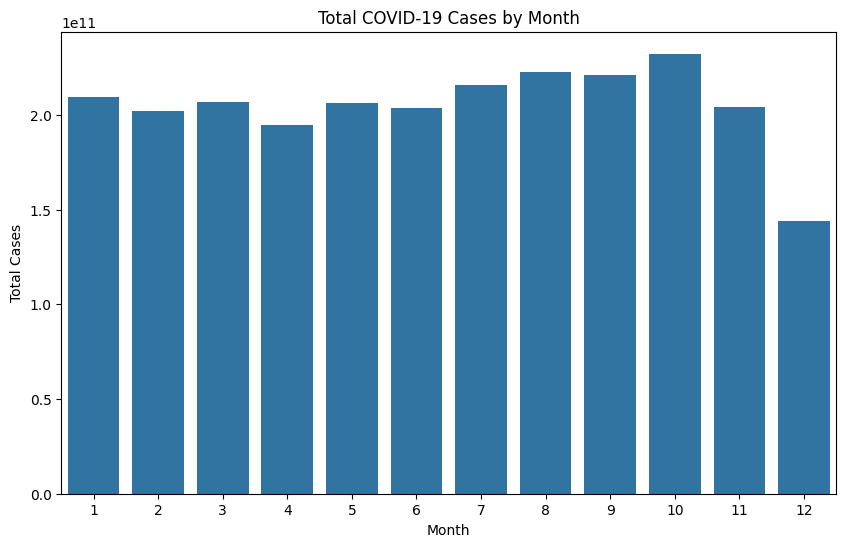

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=df_monthly_cases)
plt.title('Total COVID-19 Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The grouped bar chart shows that different continents experienced peaks in new cases at varying months throughout the dataset's timeline.
*   The box plot of total cases by year indicates that the median and variability of total cases increased significantly over the years included in the data.
*   The bar plot of total deaths by continent reveals substantial differences in the total number of reported deaths across continents, with some continents having significantly higher totals than others.
*   The bar plot of total cases by month shows the overall trend of total cases accumulated over the months across all years, highlighting months with the highest and lowest cumulative case numbers.

### Insights or Next Steps

*   Investigate the factors contributing to the variation in peak months for new cases across continents.
*   Analyze the yearly distribution of total cases and deaths more granularly to understand the progression of the pandemic over time within specific regions.
